## Covid-19 Tweets Analysis

1. Clean data
2. Questions
    - Geographic tweets locations
    - Number of tweets by time period
    - user_verified
    - Word cloud
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud,STOPWORDS

### Import Data

In [2]:
df = pd.read_csv("Resources/covid19_tweets.csv", encoding='utf-8')

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
df.shape

(179108, 13)

In [5]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [6]:
df.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [7]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [8]:
df['is_retweet'].value_counts()

False    179108
Name: is_retweet, dtype: int64

There is no retweet so I am going to drop the 'is_retweet' column

In [9]:
df.drop(columns='is_retweet',inplace=True)

In [10]:
# Convert 'date' data type into date data type. Set date column as index.
df['date'] = pd.to_datetime(df['date'])
df.set_index(df['date'],inplace=True)

In [11]:
# Chack the data frame
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
date,,,,,,,,,,,,
2020-07-25 12:27:21,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone
2020-07-25 12:27:17,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android
2020-07-25 12:27:14,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android
2020-07-25 12:27:10,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone
2020-07-25 12:27:08,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android


## 

### Geography of Tweets

In [12]:
# Extract top 20 locations
top_locations = pd.DataFrame(df['user_location'].value_counts()[:20])
top_locations

,user_location
India,3741
United States,2455
"New Delhi, India",1721
"Mumbai, India",1401
"Washington, DC",1354
"London, England",1269
United Kingdom,1206
London,1103
"New York, NY",1082
Australia,964


There are some duplicates such as India and New Delhi, India. I am going to fix them as much as possible.

In [13]:
locations = []

for loc in df['user_location']:
    if loc == 'USA':
        loc = loc.replace('USA','United States')
        locations.append(loc)
    elif loc == 'New Delhi, India':
        loc = loc.replace('New Delhi, India','India')
        locations.append(loc)
    elif loc == 'Mumbai, India':
        loc = loc.replace('Mumbai, India','India')
        locations.append(loc)
    elif loc == 'Washington, DC':
        loc = loc.replace('Washington, DC','United States')
        locations.append(loc)
    elif loc == 'London, England':
        loc = loc.replace('London, England','United Kingdom')
        locations.append(loc)
    elif loc == 'London':
        loc = loc.replace('London','United Kingdom')
        locations.append(loc)
    elif loc == 'New York, NY':
        loc = loc.replace('New York, NY','United States')
        locations.append(loc)
    elif loc == 'New Delhi':
        loc = loc.replace('New Delhi','India')
        locations.append(loc)
    elif loc == 'UK':
        loc = loc.replace('UK','United Kingdom')
        locations.append(loc)
    elif loc == 'Los Angeles, CA':
        loc = loc.replace('Los Angeles, CA','United States')
        locations.append(loc)
    elif loc == 'Lagos, Nigeria':
        loc = loc.replace('Lagos, Nigeria','Nigeria')
        locations.append(loc)
    elif loc == 'California, USA':
        loc = loc.replace('California, USA','United States')
        locations.append(loc)
    else:
        locations.append(loc)
    
    

In [14]:
df['user_location'] = locations

In [15]:
top_locations = pd.DataFrame(df['user_location'].value_counts()[:10])
top_locations

,user_location
India,7685
United States,7193
United Kingdom,4381
Nigeria,1310
Australia,964
Worldwide,879
Canada,835
WORLDWIDE,777
South Africa,766
Global,688


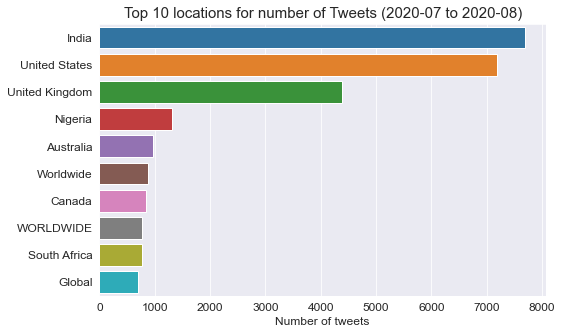

In [16]:
# Barplot for number of tweets by country location
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x=top_locations.user_location,y=top_locations.index)
plt.title("Top 10 locations for number of Tweets (2020-07 to 2020-08)", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Number of tweets", fontsize=12)
plt.show()

In [17]:
num_tweets_by_day = pd.DataFrame(df.resample('d').count()['text'])
num_tweets_by_day[:5]

,text
date,
2020-07-24,295
2020-07-25,16881
2020-07-26,7500
2020-07-27,7500
2020-07-28,7500


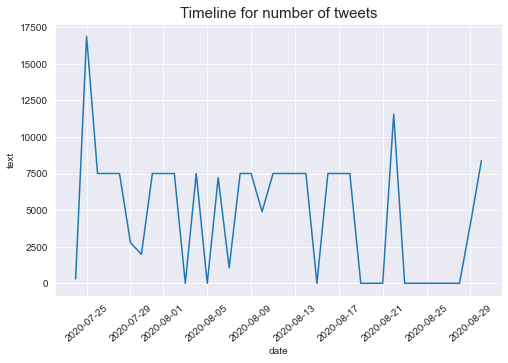

In [18]:
plt.figure(figsize=(8,5))
sns.lineplot(data = num_tweets_by_day, x=num_tweets_by_day.index, y='text')
plt.xticks(rotation=40)
plt.title("Timeline for number of tweets",fontsize=15)
plt.show()

### Verified and Non-verified users

In [59]:
user_type = df['user_verified'].value_counts()
user_type

False    156013
True      23095
Name: user_verified, dtype: int64

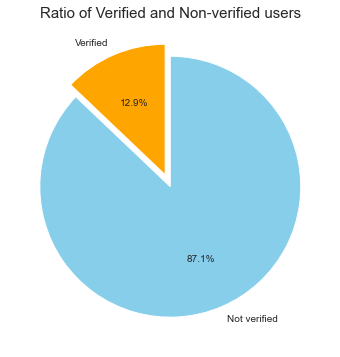

In [75]:
# Ratio of Verified and Non-verified users
label = ['Not verified','Verified']
explode = [0,0.1]
plt.figure(figsize=(6,6))
color = ['skyblue','orange']
plt.pie(user_type, labels=label, autopct="%1.1f%%",startangle=90, counterclock=False,explode=explode,colors=color)
plt.title("Ratio of Verified and Non-verified users", fontsize=15)
plt.show()

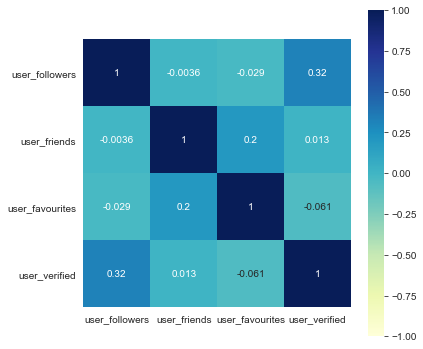

In [117]:
# Correlation between columns
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1,annot=True, square = True,cmap="YlGnBu")
plt.show()

### Word Clouds

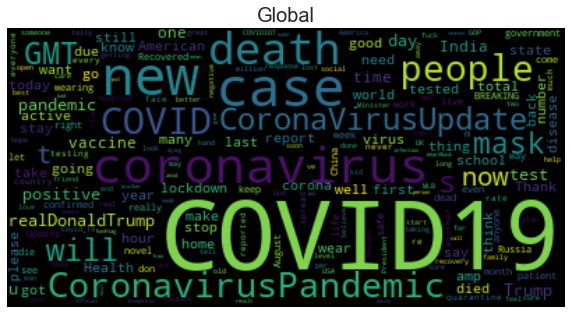

In [104]:
# Global Word Cloud
text = ' '.join(df['text'])
text = ",".join(n for n in df.text if 'https' not in n)

word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text)

plt.figure(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Global",fontsize=20)
plt.show()

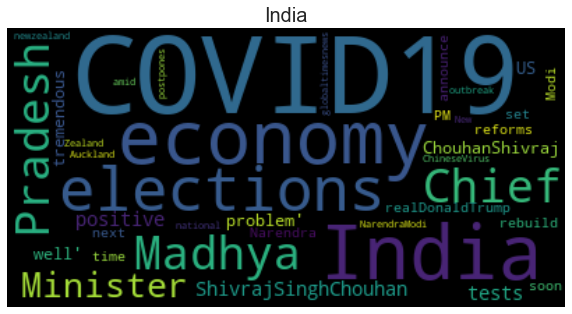

In [102]:
# Word Cloud for India
india_df = df[df['user_location'] == 'india']

india_text = ",".join(n for n in india_df.text if 'https' not in n)
india_word_cloud = WordCloud(collocations = False, background_color = 'black').generate(india_text)

plt.figure(figsize=(10,8))
plt.imshow(india_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("India", fontsize=20)
plt.show()

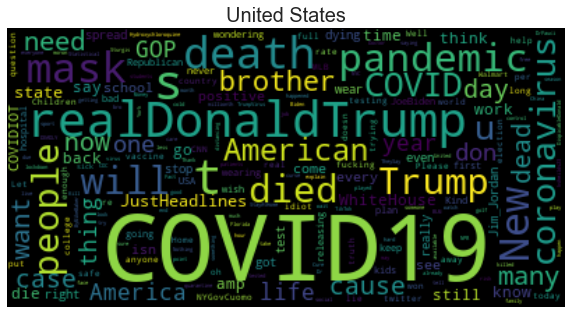

In [103]:
# Word Cloud for United States
us_df = df[df['user_location'] == 'United States']

us_text = ",".join(n for n in us_df.text if 'https' not in n)
us_word_cloud = WordCloud(collocations = False, background_color = 'black').generate(us_text)

plt.figure(figsize=(10,8))
plt.imshow(us_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("United States", fontsize=20)
plt.show()